# Holiday_Package_Prediction

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\VISHAL S PANCHANGE\Desktop\ASSIGNMENT\Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
obj_feature = df.columns[df.dtypes =='object']
obj_feature

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [5]:
num_features = df.columns[df.dtypes!='object']
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [6]:
for i in obj_feature:
    print(df[i].value_counts(),end='\n\n')

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



In [7]:
df['Gender'] = df['Gender'].replace({'Fe Male':'Female'})
df['MaritalStatus'] = df['MaritalStatus'].str.strip()
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Unmarried', 'Single')


In [8]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [9]:
df = df.applymap(lambda x : x.strip() if isinstance(x,str) else x)

In [10]:
df['MonthlyIncome'].isna().mean()

0.04766775777414075

In [11]:
df.shape

(4888, 20)

Finding Missing value in the columns

In [12]:
l =[]
for i in df.columns:
    if df[i].isna().sum()>=1:
     l.append(i)
l

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [13]:
for i in l:
    print(f" missing value of {i} is {round(df[i].isna().mean()*100,2)}%,",end="\n")

 missing value of Age is 4.62%,
 missing value of TypeofContact is 0.51%,
 missing value of DurationOfPitch is 5.14%,
 missing value of NumberOfFollowups is 0.92%,
 missing value of PreferredPropertyStar is 0.53%,
 missing value of NumberOfTrips is 2.86%,
 missing value of NumberOfChildrenVisiting is 1.35%,
 missing value of MonthlyIncome is 4.77%,


In [14]:
df.select_dtypes([int,float]).describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [15]:
# replace missing  value

In [16]:
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [17]:
for i in num_features:
    median_value = df[i].median()  # Calculate the median once for each column
    df[i] = df[i].fillna(median_value)  # Fill missing values with the median
    print(f"Number of missing values in {i} is {df[i].isna().sum()}")

Number of missing values in CustomerID is 0
Number of missing values in ProdTaken is 0
Number of missing values in Age is 0
Number of missing values in CityTier is 0
Number of missing values in DurationOfPitch is 0
Number of missing values in NumberOfPersonVisiting is 0
Number of missing values in NumberOfFollowups is 0
Number of missing values in PreferredPropertyStar is 0
Number of missing values in NumberOfTrips is 0
Number of missing values in Passport is 0
Number of missing values in PitchSatisfactionScore is 0
Number of missing values in OwnCar is 0
Number of missing values in NumberOfChildrenVisiting is 0
Number of missing values in MonthlyIncome is 0


In [18]:
df['Age'].head(5)

0    41.0
1    49.0
2    37.0
3    33.0
4    36.0
Name: Age, dtype: float64

In [19]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
4888 non-null   float64
dtypes: float64(1)
memory usage: 38.3 KB


In [20]:
obj_col1 = df.columns[df.dtypes =='object']
obj_col1

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [21]:
obj_feature

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [22]:
for i in obj_feature:
    df[i] = df[i].apply(lambda x: df[i].mode()[0] if pd.isna(x) else x)
    print(f"number of missing value{i} is {df[i].isna().sum()}")

number of missing valueTypeofContact is 0
number of missing valueOccupation is 0
number of missing valueGender is 0
number of missing valueProductPitched is 0
number of missing valueMaritalStatus is 0
number of missing valueDesignation is 0


In [23]:
#CustomerID  is not usefull for the model 

In [24]:
df = df.drop(columns =['CustomerID'])

In [25]:
df.head(3)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


In [26]:
# adding column total number of visit

In [27]:
df['NumberOfChildrenVisiting'] = pd.to_numeric(df['NumberOfChildrenVisiting'], errors='coerce')


In [28]:
df['Total_visit'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [29]:
df.head(3)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Total_visit
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0


In [30]:
df.drop(columns =['NumberOfPersonVisiting','NumberOfChildrenVisiting'], inplace= True)

In [31]:
df.head(3)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visit
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [33]:
df_object = df.columns[df.dtypes == 'object']
df_object

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [34]:
x = df.drop('ProdTaken', axis =1)
x.head(3)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visit
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0


In [35]:
y  =df['ProdTaken']
y.head(3)

0    1
1    0
2    1
Name: ProdTaken, dtype: int64

In [36]:
y.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [ ]:
#Balacing of data

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
rdo = RandomOverSampler(sampling_strategy='minority')

In [39]:
upsamp_x,upsamp_y = rdo.fit_resample(x,y)

In [40]:
upsamp_x.shape

(7936, 17)

In [41]:
upsamp_y.shape

(7936,)

In [42]:
upsamp_x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visit
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [43]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [44]:
upsamp_x.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'Total_visit'],
      dtype='object')

In [45]:
upsamp_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7936 entries, 0 to 7935
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     7936 non-null   float64
 1   TypeofContact           7936 non-null   object 
 2   CityTier                7936 non-null   int64  
 3   DurationOfPitch         7936 non-null   float64
 4   Occupation              7936 non-null   object 
 5   Gender                  7936 non-null   object 
 6   NumberOfFollowups       7936 non-null   float64
 7   ProductPitched          7936 non-null   object 
 8   PreferredPropertyStar   7936 non-null   float64
 9   MaritalStatus           7936 non-null   object 
 10  NumberOfTrips           7936 non-null   float64
 11  Passport                7936 non-null   int64  
 12  PitchSatisfactionScore  7936 non-null   int64  
 13  OwnCar                  7936 non-null   int64  
 14  Designation             7936 non-null   

In [46]:
col_obj = upsamp_x.columns[upsamp_x.dtypes == 'object']
col_num = upsamp_x.columns[upsamp_x.dtypes != 'object']

In [47]:
col_num

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total_visit'],
      dtype='object')

In [48]:
print(col_obj)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')


In [49]:
for i in col_obj:
    if i not in upsamp_x.columns:
        print(f"Column '{i}' not found in DataFrame.")

In [ ]:
#Converting Categorical data to numerical form

In [50]:
upsamp_x = pd.get_dummies(upsamp_x, columns=['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'])

In [51]:
upsamp_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7936 entries, 0 to 7935
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            7936 non-null   float64
 1   CityTier                       7936 non-null   int64  
 2   DurationOfPitch                7936 non-null   float64
 3   NumberOfFollowups              7936 non-null   float64
 4   PreferredPropertyStar          7936 non-null   float64
 5   NumberOfTrips                  7936 non-null   float64
 6   Passport                       7936 non-null   int64  
 7   PitchSatisfactionScore         7936 non-null   int64  
 8   OwnCar                         7936 non-null   int64  
 9   MonthlyIncome                  7936 non-null   float64
 10  Total_visit                    7936 non-null   float64
 11  TypeofContact_Company Invited  7936 non-null   uint8  
 12  TypeofContact_Self Enquiry     7936 non-null   u

In [86]:
# After scaling, the features will be within the range [0, 1] (or another specified range).

In [52]:
upsamp_x1 = upsamp_x.copy()

In [53]:
num_upsam = ['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total_visit']

In [54]:
norm = MinMaxScaler()

In [55]:
upsamp_x1[num_upsam] = norm.fit_transform(upsamp_x1[num_upsam])

In [56]:
upsamp_x1.head()

,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,...,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0.534884,1.0,0.008197,0.4,0.0,0.000000,1.0,0.25,1.0,0.204683,...,0,0,0,0,1,0,0,1,0,0
1,0.720930,0.0,0.073770,0.6,0.5,0.047619,0.0,0.50,1.0,0.195848,...,0,0,1,0,0,0,0,1,0,0
2,0.441860,0.0,0.024590,0.6,0.0,0.285714,1.0,0.50,0.0,0.164725,...,0,0,0,0,1,0,1,0,0,0
3,0.348837,0.0,0.032787,0.4,0.0,0.047619,1.0,1.00,1.0,0.173110,...,0,0,1,0,0,0,1,0,0,0
4,0.418605,0.0,0.024590,0.4,0.5,0.000000,0.0,1.00,1.0,0.178832,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
# spliting data into test and train

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(upsamp_x1,upsamp_y)

In [59]:
print(x_train.shape, end='\n')
print(x_test.shape, end='\n')
print(y_train.shape, end='\n')
print(y_test.shape, end='\n')

(5952, 32)
(1984, 32)
(5952,)
(1984,)


In [60]:
upsamp_x1.describe()

,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,...,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
count,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,...,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000
mean,0.430634,0.361013,0.088666,0.561089,0.316343,0.107875,0.384451,0.533770,0.610383,0.225603,...,0.144783,0.051159,0.168851,0.435358,0.395791,0.051159,0.461316,0.304688,0.144783,0.038054
std,0.219927,0.468772,0.067999,0.200310,0.410798,0.089988,0.486496,0.336772,0.487694,0.051495,...,0.351904,0.220336,0.374644,0.495835,0.489051,0.220336,0.498533,0.460304,0.351904,0.191340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279070,0.000000,0.032787,0.400000,0.000000,0.047619,0.000000,0.250000,0.000000,0.195453,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.418605,0.000000,0.065574,0.600000,0.000000,0.095238,0.000000,0.500000,1.000000,0.214291,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.558140,1.000000,0.131148,0.600000,0.500000,0.142857,1.000000,0.750000,1.000000,0.244548,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

Univariant selection

In [61]:
from sklearn.feature_selection import SelectKBest,chi2

In [62]:
skb = SelectKBest(score_func= chi2,k=20)

In [63]:
skb.fit(upsamp_x1,upsamp_y)

SelectKBest(k=20, score_func=<function chi2 at 0x0000023ADACD4550>)

In [64]:
from numpy import printoptions

In [65]:
skb.scores_

array([2.74697265e+01, 6.18642234e+01, 3.47871274e+00, 1.23812073e+01,
       5.37965545e+01, 4.67237735e-01, 4.68051459e+02, 7.64872521e+00,
       2.06440958e+00, 2.61870189e+00, 1.88681415e-01, 2.03723884e+01,
       9.04986351e+00, 7.00000000e+00, 3.85273632e+01, 9.09129968e+00,
       2.94031167e-04, 5.92061460e+00, 3.84372402e+00, 3.19191751e+02,
       1.68339123e+02, 4.61059603e+01, 6.58746736e+00, 1.39517241e+02,
       7.26447761e+01, 9.50301013e+01, 2.49355301e+02, 1.39517241e+02,
       3.19191751e+02, 1.68339123e+02, 6.58746736e+00, 4.61059603e+01])

In [66]:
pd.Series(skb.scores_, index=upsamp_x1.columns).sort_values(ascending=False)

Passport                         468.051459
Designation_Executive            319.191751
ProductPitched_Basic             319.191751
MaritalStatus_Single             249.355301
Designation_Manager              168.339123
ProductPitched_Deluxe            168.339123
Designation_AVP                  139.517241
ProductPitched_Super Deluxe      139.517241
MaritalStatus_Married             95.030101
MaritalStatus_Divorced            72.644776
CityTier                          61.864223
PreferredPropertyStar             53.796554
Designation_VP                    46.105960
ProductPitched_King               46.105960
Occupation_Large Business         38.527363
Age                               27.469727
TypeofContact_Company Invited     20.372388
NumberOfFollowups                 12.381207
Occupation_Salaried                9.091300
TypeofContact_Self Enquiry         9.049864
PitchSatisfactionScore             7.648725
Occupation_Free Lancer             7.000000
ProductPitched_Standard         

Recursive Feature Elimination

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()

In [69]:
rfe = RFE(estimator= lr)

In [70]:
rfe.fit(upsamp_x1,upsamp_y)

C:\Users\VISHAL S PANCHANGE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VISHAL S PANCHANGE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

RFE(estimator=LogisticRegression())

In [71]:
rfe.ranking_


array([ 3,  1,  1,  1,  1,  1,  1,  1, 15,  1,  1, 13,  6,  2, 12,  1,  1,
        9, 14,  4, 10, 16,  5,  1,  7,  8,  1,  1,  1,  1, 11, 17])

In [72]:
pd.Series(data = rfe.ranking_,index = upsamp_x1.columns).sort_values(ascending = True)

Occupation_Salaried               1
MaritalStatus_Single              1
Designation_AVP                   1
Designation_Executive             1
Total_visit                       1
MonthlyIncome                     1
ProductPitched_Super Deluxe       1
Designation_Manager               1
Passport                          1
NumberOfTrips                     1
PreferredPropertyStar             1
NumberOfFollowups                 1
DurationOfPitch                   1
CityTier                          1
PitchSatisfactionScore            1
Occupation_Small Business         1
Occupation_Free Lancer            2
Age                               3
ProductPitched_Basic              4
ProductPitched_Standard           5
TypeofContact_Self Enquiry        6
MaritalStatus_Divorced            7
MaritalStatus_Married             8
Gender_Female                     9
ProductPitched_Deluxe            10
Designation_Senior Manager       11
Occupation_Large Business        12
TypeofContact_Company Invite

Tree Based Selection

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dc = DecisionTreeClassifier()

In [75]:
dc.fit(upsamp_x1,upsamp_y)

DecisionTreeClassifier()

In [76]:
dc.feature_importances_

array([0.12238407, 0.05213743, 0.13439208, 0.03881555, 0.06940367,
       0.06263271, 0.09581401, 0.06121636, 0.01406722, 0.07939027,
       0.02125172, 0.01215559, 0.02191141, 0.        , 0.00690574,
       0.01390164, 0.01277689, 0.01763454, 0.00655943, 0.00228328,
       0.01686338, 0.00115498, 0.00450816, 0.0044935 , 0.00043323,
       0.00058641, 0.04202438, 0.00513959, 0.06514495, 0.00851646,
       0.00550138, 0.        ])

In [77]:
pd.Series(data = dc.feature_importances_, index= upsamp_x1.columns).sort_values(ascending = False)

DurationOfPitch                  0.134392
Age                              0.122384
Passport                         0.095814
MonthlyIncome                    0.079390
PreferredPropertyStar            0.069404
Designation_Executive            0.065145
NumberOfTrips                    0.062633
PitchSatisfactionScore           0.061216
CityTier                         0.052137
MaritalStatus_Single             0.042024
NumberOfFollowups                0.038816
TypeofContact_Self Enquiry       0.021911
Total_visit                      0.021252
Gender_Female                    0.017635
ProductPitched_Deluxe            0.016863
OwnCar                           0.014067
Occupation_Salaried              0.013902
Occupation_Small Business        0.012777
TypeofContact_Company Invited    0.012156
Designation_Manager              0.008516
Occupation_Large Business        0.006906
Gender_Male                      0.006559
Designation_Senior Manager       0.005501
Designation_AVP                  0

# Model Building

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [79]:
models = [
    DecisionTreeClassifier(criterion='gini'),
    RandomForestClassifier(n_estimators=100, bootstrap=True),
    AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=50),
    GradientBoostingClassifier(loss='exponential', learning_rate=0.3, n_estimators=150, subsample=0.5),
    xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.3, subsample=1, min_child_weight=2)
]

In [80]:
for i  in range (len(models)):
    model = models[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    acc_score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test,y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    prec_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test,y_pred)
    f_score = f1_score(y_test,y_pred)
    r_a_score = roc_auc_score(y_test, y_pred)
    
    
    print(f'{model} Performance'.center(100,'*'))
    print(f'The Accuracy of {model} : {acc_score}',end='\n')
    print('Confusion Matrix')
    print(confusion)
    print('Classfication Report')
    print(report, end='\n\n')
    print(f'The Precision score of {model} : {prec_score}',end='\n')
    print(f'The Recall Score of {model} : {rec_score}',end='\n')
    print(f'The F1 Score of {model} : {f_score}',end='\n')
    print(f'The Roc Auc score of {model} : {r_a_score}',end='\n\n\n')

********************************DecisionTreeClassifier() Performance********************************
The Accuracy of DecisionTreeClassifier() : 0.9707661290322581
Confusion Matrix
[[937  54]
 [  4 989]]
Classfication Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       991
           1       0.95      1.00      0.97       993

    accuracy                           0.97      1984
   macro avg       0.97      0.97      0.97      1984
weighted avg       0.97      0.97      0.97      1984


The Precision score of DecisionTreeClassifier() : 0.9482262703739214
The Recall Score of DecisionTreeClassifier() : 0.9959718026183283
The F1 Score of DecisionTreeClassifier() : 0.9715127701375246
The Roc Auc score of DecisionTreeClassifier() : 0.9707406944474083


********************************RandomForestClassifier() Performance********************************
The Accuracy of RandomForestClassifier() : 0.9949596774193549
Confusion Matrix
[[

In [81]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

tuned_model = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=rf_params,cv=5,verbose=2,n_jobs=-1)
tuned_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [82]:
print(f'Best Parameters of the Tuned Model : {tuned_model.best_params_}')

Best Parameters of the Tuned Model : {'n_estimators': 100, 'min_samples_split': 8, 'max_features': 5, 'max_depth': None}


In [83]:
y_pred_tuned = tuned_model.predict(x_test)

In [84]:
#Evaluating the tuned model
print(f'Tuned Model Performance'.center(100,'*'))
print(f'The Accuracy of Tuned Model : {accuracy_score(y_test,y_pred_tuned)}',end='\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_tuned),end='\n\n')
print('Classfication Report')
print(classification_report(y_test,y_pred_tuned), end='\n\n')
print(f'The Precision score of Tuned Model : {precision_score(y_test,y_pred_tuned)}',end='\n')
print(f'The Recall Score of Tuned Model : {recall_score(y_test,y_pred_tuned)}',end='\n')
print(f'The F1 Score of Tuned Model : {f1_score(y_test,y_pred_tuned)}',end='\n')
print(f'The Roc Auc score of Tuned Model : {roc_auc_score(y_test,y_pred_tuned)}',end='\n\n\n')

**************************************Tuned Model Performance***************************************
The Accuracy of Tuned Model : 0.9873991935483871
Confusion Matrix
[[968  23]
 [  2 991]]

Classfication Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       991
           1       0.98      1.00      0.99       993

    accuracy                           0.99      1984
   macro avg       0.99      0.99      0.99      1984
weighted avg       0.99      0.99      0.99      1984


The Precision score of Tuned Model : 0.9773175542406312
The Recall Score of Tuned Model : 0.9979859013091642
The F1 Score of Tuned Model : 0.9875435974090682
The Roc Auc score of Tuned Model : 0.9873885106949454




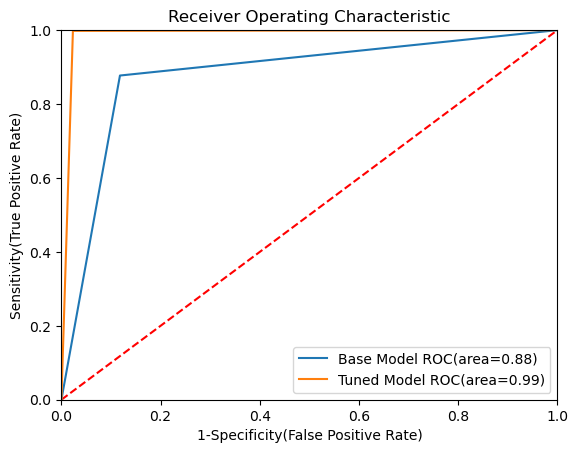

In [85]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuned)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot(fpr1,tpr1,label='Base Model ROC(area=%0.2f)'%(roc_auc_score(y_test,y_pred)))
plt.plot(fpr,tpr,label='Tuned Model ROC(area=%0.2f)'%(roc_auc_score(y_test,y_pred_tuned)))

plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
